In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

auto = pd.read_csv('prime.csv')

print(auto.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [2]:
#to check missing values

auto.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [3]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df = pd.DataFrame(auto)

In [5]:
# Check for missing values
print("Original DataFrame:")
print(df)
print("\nChecking for missing values:")
print(df.isnull())

Original DataFrame:
     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba

In [17]:
df.dropna(subset=['director'], inplace=True)


In [15]:
df.dropna(subset=['cast'], inplace=True)
df.dropna(subset=['country'], inplace=True)
df.dropna(subset=['duration'], inplace=True)
df.dropna(subset=['rating'], inplace=True)
df.dropna(subset=['date_added'], inplace=True)


In [18]:
print(df_cleaned)

     show_id     type                          title             director  \
7         s8    Movie                        Sankofa         Haile Gerima   
8         s9  TV Show  The Great British Baking Show      Andy Devonshire   
9        s10    Movie                   The Starling       Theodore Melfi   
12       s13    Movie                   Je Suis Karl  Christian Schwochow   
24       s25    Movie                          Jeans           S. Shankar   
...      ...      ...                            ...                  ...   
8801   s8802    Movie                        Zinzana      Majid Al Ansari   
8802   s8803    Movie                         Zodiac        David Fincher   
8804   s8805    Movie                     Zombieland      Ruben Fleischer   
8805   s8806    Movie                           Zoom         Peter Hewitt   
8806   s8807    Movie                         Zubaan          Mozez Singh   

                                                   cast  \
7     Kofi Ghana

In [20]:
# Check for missing values in the DataFrame after dropping rows
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [21]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in auto.columns:
    print('{} : {}'.format(col,auto[col].unique()))

show_id : ['s1' 's2' 's3' ... 's8805' 's8806' 's8807']
type : ['Movie' 'TV Show']
title : ['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']
director : ['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']
cast : [nan
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers'
 'Vicky Kaushal, 

In [22]:
for col in auto.columns:
    auto[col].replace({'?':np.nan},inplace=True)
auto.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


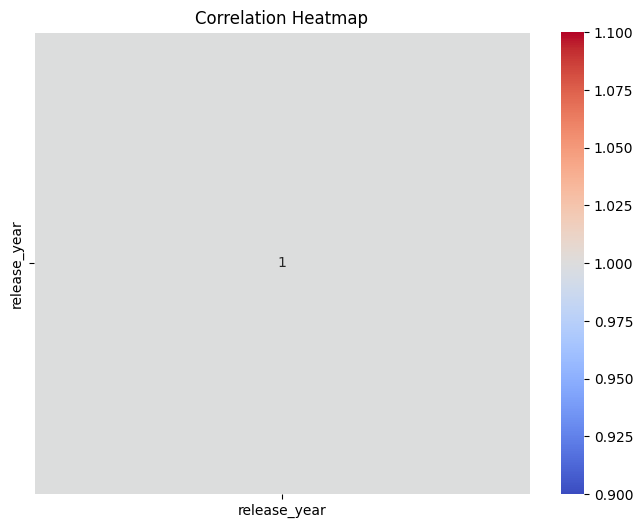

In [26]:

import matplotlib.pyplot as plt
import seaborn as sns
numerical_attributes = ['release_year', 'rating']
subset_data = auto[numerical_attributes]

#correlation matrix

correlation_matrix = subset_data.corr(numeric_only=True)


# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#A correlation coefficient of 1 for the "release_year" variable in the correlation matrix means that there is a perfect positive linear relationship between "release_year" and itself. In other words, it indicates that as the "release_year" increases, the value of "release_year" also increases in a perfectly linear manner. This is not surprising, as "release_year" is a continuous variable that represents the year in which a movie was released, and, naturally, it will have a perfect positive correlation with itself.

#In practice, the correlation coefficient being 1 for a variable with itself is expected and doesn't provide meaningful information for analysis since it's a perfect relationship. When performing correlation analysis, it's more informative to focus on the correlations between different variables to understand how they relate to each other.

#If you find that the correlation coefficient between "release_year" and other variables is close to 1, it could be due to data-related issues or the way the data is structured. In such cases, you might want to examine the data and the analysis more closely to determine if there are any anomalies or issues with the dataset.

In [ ]:
#positive correlation with release year alone

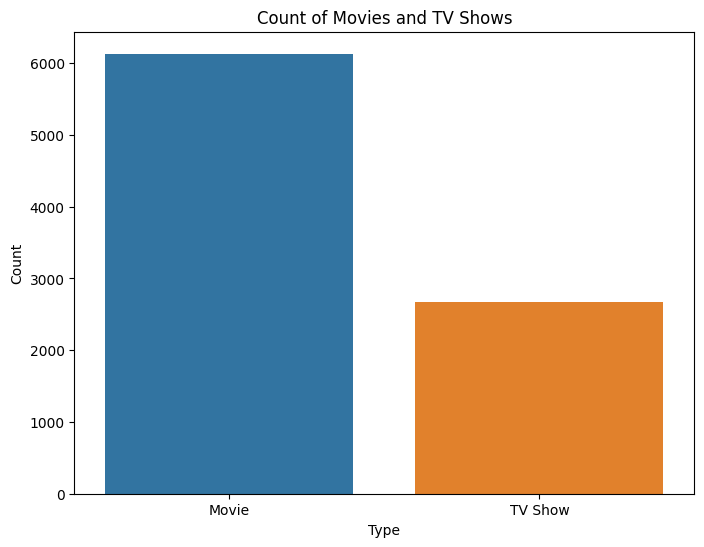

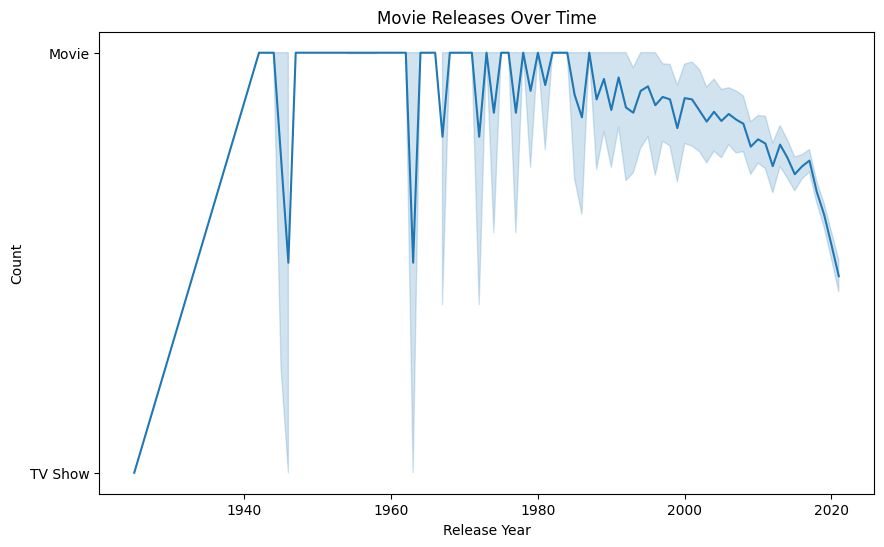

In [29]:
#Visualizationss
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
#data = pd.read_csv('amazon_prime_dataset.csv')

# Bar Chart for Movie Type
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=auto)
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

# Line Chart for Movie Releases Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='release_year', y='type', data=auto)
plt.title("Movie Releases Over Time")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()




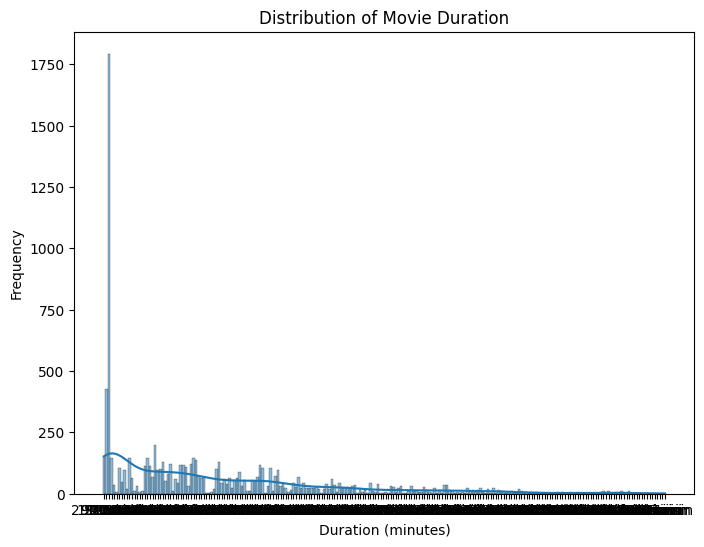

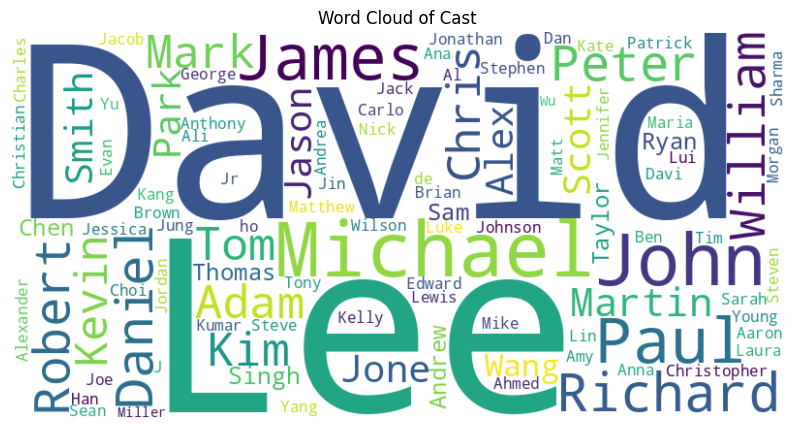

In [31]:
# Histogram for Movie Duration
plt.figure(figsize=(8, 6))
sns.histplot(auto['duration'], bins=20, kde=True)
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

# Word Cloud for Cast
cast_text = " ".join(auto['cast'].fillna(''))
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(cast_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Cast")
plt.axis("off")
plt.show()



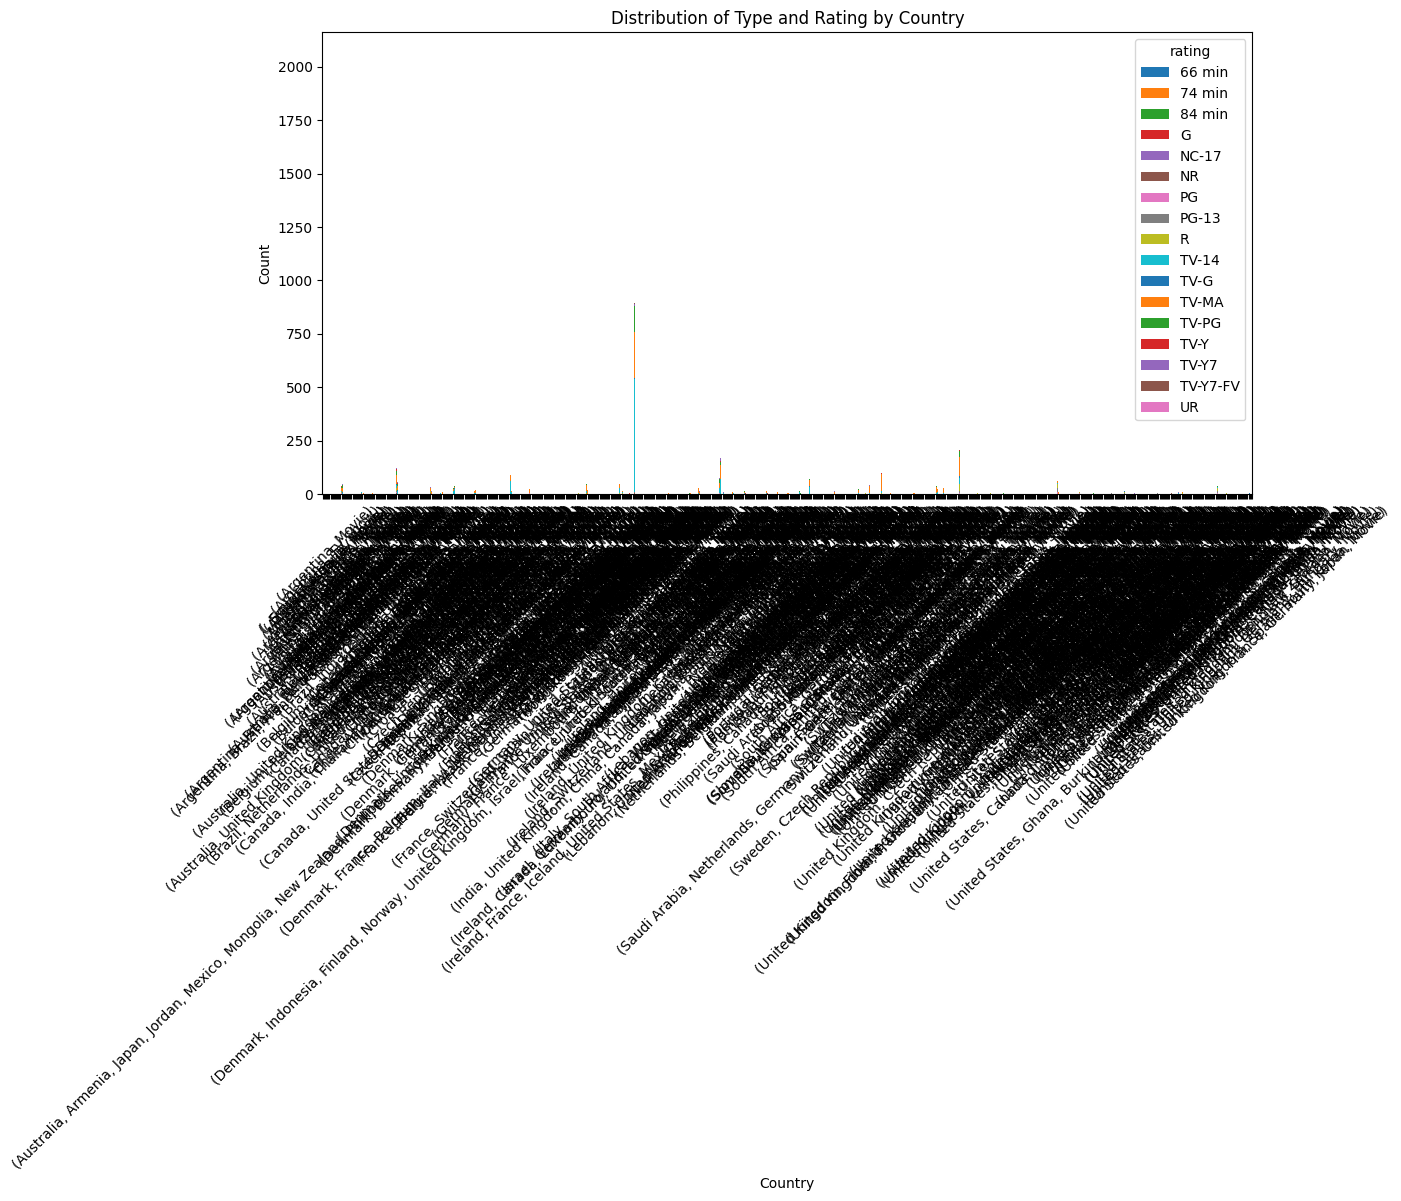

TypeError: ignored

<Figure size 800x600 with 0 Axes>

In [32]:
# stacked Bar Chart for Type and Rating by Country
subset_data = auto[['country', 'type', 'rating']]
country_type_rating = subset_data.groupby(['country', 'type', 'rating']).size().unstack(fill_value=0)
country_type_rating.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Distribution of Type and Rating by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()




In [33]:
# box Plot for Movie Duration
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='duration', data=auto)
plt.title("Box Plot of Movie Duration by Type")
plt.xlabel("Type")
plt.ylabel("Duration (minutes)")
plt.show()


TypeError: ignored

<Figure size 800x600 with 0 Axes>

In [35]:
# Summary statistics
summary_stats = auto.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


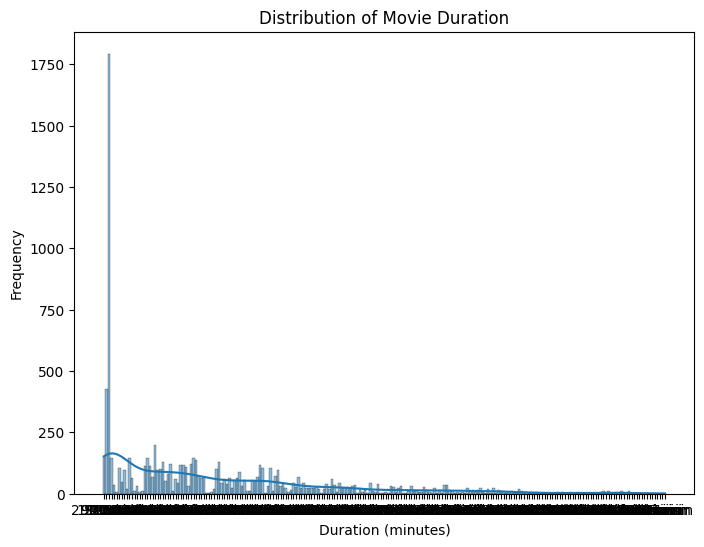

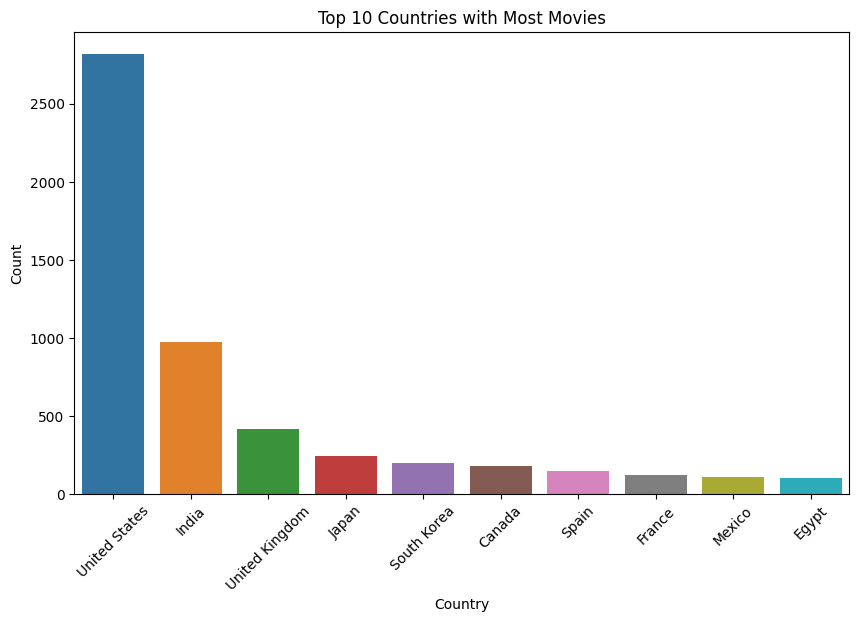

<ipython-input-36-65a5ddf6769b>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = auto.corr()


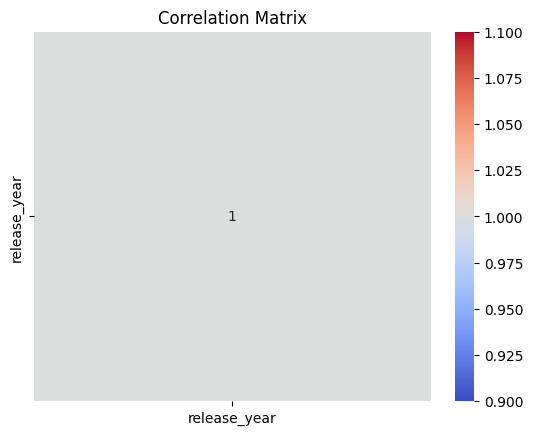

In [36]:

 #Data Visualization
#Histogram of movie duration
plt.figure(figsize=(8, 6))
sns.histplot(auto['duration'], bins=20, kde=True)
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

#Count of movies by country
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=auto, order=auto['country'].value_counts().index[:10])
plt.title("Top 10 Countries with Most Movies")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#Explore relationships (correlations)
correlation_matrix = auto.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

<Axes: xlabel='release_year', ylabel='date_added'>

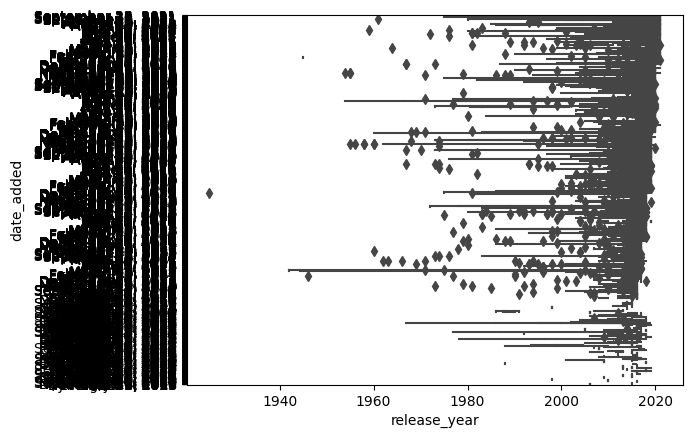

In [40]:
sns.boxplot(x='release_year',y='date_added',data=auto)